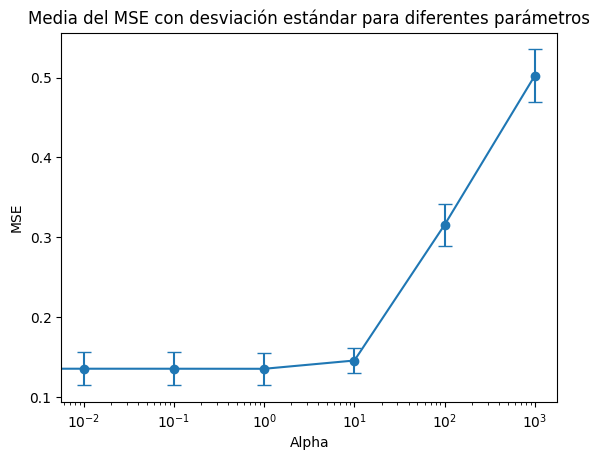

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./data/week3.csv', skiprows=1, header=None)
data.columns = ['X1', 'X2', 'y']
df = data.copy()
df.head()

X1 = df.iloc[:, 0].values
X2 = df.iloc[:, 1].values
X = np.column_stack((X1, X2))
y = df.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

alphas = [0, 0.01, 0.1, 1, 10, 100, 1000]

alpha_grid = {'alpha':alphas}

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

ridge = Ridge()
grid_search = GridSearchCV(
    ridge, 
    alpha_grid, 
    cv=5, 
    scoring=scoring, 
    refit='r2')

grid_search.fit(X_train, y_train)

mean_neg_rmse = grid_search.cv_results_['mean_test_neg_mse']
std_neg_rmse = grid_search.cv_results_['std_test_neg_mse']

rmse_mean = -mean_neg_rmse
rmse_std = std_neg_rmse

# Plot the mean RMSE with error bars representing the standard deviation
plt.errorbar(alphas, rmse_mean, yerr=rmse_std, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Media del MSE con desviación estándar para diferentes parámetros')
plt.show()